<a href="https://www.kaggle.com/code/aleksandrmorozov123/google-smartphone-decimeter-challenge-2022?scriptVersionId=94906576" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smartphone-decimeter-2022/sample_submission.csv
/kaggle/input/smartphone-decimeter-2022/metadata/constellation_type_mapping.csv
/kaggle/input/smartphone-decimeter-2022/metadata/accumulated_delta_range_state_bit_map.json
/kaggle/input/smartphone-decimeter-2022/metadata/raw_state_bit_map.json
/kaggle/input/smartphone-decimeter-2022/test/2022-01-04-US-MTV-1/SamsungGalaxyS20Ultra/device_gnss.csv
/kaggle/input/smartphone-decimeter-2022/test/2022-01-04-US-MTV-1/SamsungGalaxyS20Ultra/device_imu.csv
/kaggle/input/smartphone-decimeter-2022/test/2022-01-04-US-MTV-1/SamsungGalaxyS20Ultra/supplemental/gnss_log.txt
/kaggle/input/smartphone-decimeter-2022/test/2022-01-04-US-MTV-1/SamsungGalaxyS20Ultra/supplemental/gnss_rinex.22o
/kaggle/input/smartphone-decimeter-2022/test/2022-04-22-US-OAK-2/XiaomiMi8/device_gnss.csv
/kaggle/input/smartphone-decimeter-2022/test/2022-04-22-US-OAK-2/XiaomiMi8/device_imu.csv
/kaggle/input/smartphone-decimeter-2022/test/2022-04-22-US-OAK-2/XiaomiMi8/suppl

**After examining the data, a discrepancy was found in the test and training datasets. Let's try to conduct a comparative analysis of data on the same smartphone model - Samsung Galaxy S20 Ultra**

**First, read the data. The data in dataset "device_gnss"is more suitable, since the dataset "device_imu" contains data only about the position of the smartphone in space**

In [2]:
import pandas as pd
# read the test and train dataset in the Samsung Galaxy S20 Ultra
data2020 = pd.read_csv ('../input/smartphone-decimeter-2022/test/2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra/device_gnss.csv')
data2020.head (10)

,MessageType,utcTimeMillis,TimeNanos,LeapSecond,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,HardwareClockDiscontinuityCount,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
0,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,767.686999,521.521489,-179802.186312,0.000950,0.0,4.314680,3.109136,-2.696237e+06,-4.297676e+06,3.852383e+06
1,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-65.420016,3175.943712,-12110.574637,-0.000722,0.0,6.079826,4.253673,-2.696237e+06,-4.297676e+06,3.852383e+06
2,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,1052.359288,-1066.455538,3293.778321,0.001207,0.0,7.344278,8.396952,-2.696237e+06,-4.297676e+06,3.852383e+06
3,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-1620.451945,-2629.678449,-10206.079393,-0.001740,0.0,3.823863,2.582179,-2.696237e+06,-4.297676e+06,3.852383e+06
4,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.696237e+06,-4.297676e+06,3.852383e+06
5,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-1665.336938,2457.844837,156705.451153,0.000414,0.0,11.755449,15.345103,-2.696237e+06,-4.297676e+06,3.852383e+06
6,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,227.481993,-2527.329409,12916.063114,0.009334,0.0,11.634795,14.585852,-2.696237e+06,-4.297676e+06,3.852383e+06
7,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-2540.368236,-1306.175412,38187.970265,0.001631,0.0,4.114149,2.866592,-2.696237e+06,-4.297676e+06,3.852383e+06
8,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-1279.378623,2145.128219,-101349.233639,-0.002030,0.0,6.326697,4.722802,-2.696237e+06,-4.297676e+06,3.852383e+06
9,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-1116.792378,-662.122176,-34264.937193,-0.000696,0.0,9.171244,16.608825,-2.696237e+06,-4.297676e+06,3.852383e+06


In [3]:
data2021 = pd.read_csv ('../input/smartphone-decimeter-2022/train/2021-08-04-US-SJC-1/SamsungGalaxyS20Ultra/device_gnss.csv')
data2021.head (10)

,MessageType,utcTimeMillis,TimeNanos,LeapSecond,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,HardwareClockDiscontinuityCount,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
0,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,732.675242,-1776.361672,-15012.859110,-0.000593,0.0,6.199494,21.276633,-2.687424e+06,-4.309461e+06,3.845486e+06
1,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,47.380705,3005.297005,-52731.459525,-0.001628,0.0,3.470990,3.484606,-2.687424e+06,-4.309461e+06,3.845486e+06
2,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,2631.372353,1024.429178,50040.744127,0.001032,0.0,5.274862,8.242352,-2.687424e+06,-4.309461e+06,3.845486e+06
3,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,2033.463695,1839.052261,-39175.555443,-0.000542,0.0,3.703969,3.917919,-2.687424e+06,-4.309461e+06,3.845486e+06
4,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,-837.229398,-2394.088428,-110433.760027,-0.001673,0.0,4.606047,5.376932,-2.687424e+06,-4.309461e+06,3.845486e+06
5,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,-1738.488158,-870.597778,100627.274724,-0.001042,0.0,2.702851,2.751596,-2.687424e+06,-4.309461e+06,3.845486e+06
6,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,374.890304,2111.872645,22553.254386,-0.001502,0.0,2.580234,2.543006,-2.687424e+06,-4.309461e+06,3.845486e+06
7,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,-421.573190,-3067.464990,35613.936946,0.001858,0.0,5.233314,6.194002,-2.687424e+06,-4.309461e+06,3.845486e+06
8,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,-2704.497391,456.270471,-51992.563165,-0.002372,0.0,5.113633,7.511099,-2.687424e+06,-4.309461e+06,3.845486e+06
9,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,17.916001,-3228.795207,-117250.896956,-0.001898,0.0,4.349862,4.395257,-2.687424e+06,-4.309461e+06,3.845486e+06


**Clean data in data2020 and data2021**

In [4]:
data2020.dtypes

MessageType                                   object
utcTimeMillis                                  int64
TimeNanos                                      int64
LeapSecond                                   float64
FullBiasNanos                                  int64
BiasNanos                                    float64
BiasUncertaintyNanos                         float64
DriftNanosPerSecond                          float64
DriftUncertaintyNanosPerSecond               float64
HardwareClockDiscontinuityCount                int64
Svid                                           int64
TimeOffsetNanos                              float64
State                                          int64
ReceivedSvTimeNanos                            int64
ReceivedSvTimeUncertaintyNanos                 int64
Cn0DbHz                                      float64
PseudorangeRateMetersPerSecond               float64
PseudorangeRateUncertaintyMetersPerSecond    float64
AccumulatedDeltaRangeState                    

In [5]:
data2020.isnull ().sum ()

MessageType                                      0
utcTimeMillis                                    0
TimeNanos                                        0
LeapSecond                                   67626
FullBiasNanos                                    0
BiasNanos                                        0
BiasUncertaintyNanos                             0
DriftNanosPerSecond                              0
DriftUncertaintyNanosPerSecond                   0
HardwareClockDiscontinuityCount                  0
Svid                                             0
TimeOffsetNanos                                  0
State                                            0
ReceivedSvTimeNanos                              0
ReceivedSvTimeUncertaintyNanos                   0
Cn0DbHz                                          0
PseudorangeRateMetersPerSecond                   0
PseudorangeRateUncertaintyMetersPerSecond        0
AccumulatedDeltaRangeState                       0
AccumulatedDeltaRangeMeters    

In [6]:
data2021.dtypes

MessageType                                   object
utcTimeMillis                                  int64
TimeNanos                                      int64
LeapSecond                                   float64
FullBiasNanos                                  int64
BiasNanos                                    float64
BiasUncertaintyNanos                         float64
DriftNanosPerSecond                          float64
DriftUncertaintyNanosPerSecond               float64
HardwareClockDiscontinuityCount                int64
Svid                                           int64
TimeOffsetNanos                              float64
State                                          int64
ReceivedSvTimeNanos                            int64
ReceivedSvTimeUncertaintyNanos                 int64
Cn0DbHz                                      float64
PseudorangeRateMetersPerSecond               float64
PseudorangeRateUncertaintyMetersPerSecond    float64
AccumulatedDeltaRangeState                    

In [7]:
data2021.isnull ().sum ()

MessageType                                      0
utcTimeMillis                                    0
TimeNanos                                        0
LeapSecond                                   64995
FullBiasNanos                                    0
BiasNanos                                        0
BiasUncertaintyNanos                             0
DriftNanosPerSecond                              0
DriftUncertaintyNanosPerSecond                   0
HardwareClockDiscontinuityCount                  0
Svid                                             0
TimeOffsetNanos                                  0
State                                            0
ReceivedSvTimeNanos                              0
ReceivedSvTimeUncertaintyNanos                   0
Cn0DbHz                                          0
PseudorangeRateMetersPerSecond                   0
PseudorangeRateUncertaintyMetersPerSecond        0
AccumulatedDeltaRangeState                       0
AccumulatedDeltaRangeMeters    

In [8]:
data2020.shape

(67626, 47)

In [9]:
data2021.shape

(64995, 47)

**Datasets are almost the same size**

In [10]:
data2020.describe ()

,utcTimeMillis,TimeNanos,LeapSecond,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,HardwareClockDiscontinuityCount,Svid,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
count,6.762600e+04,6.762600e+04,0.0,6.762600e+04,67626.0,67626.000000,67626.000000,67626.0,67626.0,67626.000000,...,47568.000000,47568.000000,4.756800e+04,47568.000000,47568.000000,47568.000000,47568.000000,6.762600e+04,6.762600e+04,6.762600e+04
mean,1.619652e+12,3.419425e+12,NaN,-1.303683e+18,0.0,6.704935,406.263345,1.0,12.0,28.459853,...,-573.924493,97.549941,2.843752e+03,-0.000596,0.818989,6.909353,6.531190,-2.695458e+06,-4.298716e+06,3.851777e+06
std,4.976687e+05,4.976690e+11,NaN,2.022503e+05,0.0,0.494392,1.574807,0.0,0.0,39.389889,...,940.842464,2133.219502,2.502194e+05,0.004038,6.304255,2.826883,5.929166,4.925296e+02,6.627058e+02,3.922954e+02
min,1.619651e+12,2.560946e+12,NaN,-1.303683e+18,0.0,5.895416,402.000000,1.0,12.0,1.000000,...,-2540.368236,-2999.037718,-3.288071e+05,-0.013180,-39.952730,3.793380,2.563555,-2.696244e+06,-4.299624e+06,3.851227e+06
25%,1.619651e+12,2.987947e+12,NaN,-1.303683e+18,0.0,6.395383,405.000000,1.0,12.0,13.000000,...,-1200.389454,-1688.640086,-1.798012e+05,-0.001540,-1.940921,4.351917,2.856043,-2.695838e+06,-4.299210e+06,3.851479e+06
50%,1.619652e+12,3.415947e+12,NaN,-1.303683e+18,0.0,6.591821,407.000000,1.0,12.0,21.000000,...,-543.605259,183.765062,-1.020666e+04,-0.000004,0.000000,6.718273,3.440875,-2.695385e+06,-4.298863e+06,3.851666e+06
75%,1.619652e+12,3.850947e+12,NaN,-1.303683e+18,0.0,6.878109,408.000000,1.0,12.0,29.000000,...,229.192199,2346.043013,1.246159e+05,0.001214,2.955376,8.419283,8.198265,-2.695123e+06,-4.298156e+06,3.852135e+06
max,1.619653e+12,4.283947e+12,NaN,-1.303683e+18,0.0,10.636252,409.000000,1.0,12.0,194.000000,...,1188.004523,3176.117103,1.801874e+06,0.009342,115.706421,22.613424,42.648494,-2.694588e+06,-4.297632e+06,3.852432e+06


In [11]:
data2021.describe ()

,utcTimeMillis,TimeNanos,LeapSecond,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,HardwareClockDiscontinuityCount,Svid,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
count,6.499500e+04,6.499500e+04,0.0,6.499500e+04,64995.0,64995.000000,64995.000000,64995.0,64995.0,64995.000000,...,47326.000000,47326.000000,4.732600e+04,47326.000000,47326.000000,47326.000000,47326.000000,6.499500e+04,6.499500e+04,6.499500e+04
mean,1.628110e+12,8.484631e+11,NaN,-1.312145e+18,0.0,5.955018,355.134718,1.0,4.0,26.709962,...,-301.975152,119.040557,6.345016e+04,-0.000172,2.878809,4.994691,6.360342,-2.688353e+06,-4.308894e+06,3.845432e+06
std,4.479926e+05,4.479930e+11,NaN,1.587262e+05,0.0,0.568978,2.080526,0.0,0.0,37.727855,...,1508.676742,2241.623526,3.526746e+05,0.002182,5.366768,2.208381,5.898048,7.770868e+02,5.181052e+02,6.743022e+01
min,1.628110e+12,7.603500e+10,NaN,-1.312145e+18,0.0,5.243823,352.000000,1.0,4.0,1.000000,...,-2916.562804,-3423.247654,-2.846395e+05,-0.012122,-18.871471,2.580234,2.543006,-2.689479e+06,-4.309479e+06,3.845352e+06
25%,1.628110e+12,4.600350e+11,NaN,-1.312145e+18,0.0,5.627991,353.000000,1.0,4.0,13.000000,...,-1606.059913,-2056.343492,-7.788738e+04,-0.001524,0.000000,3.103037,2.929261,-2.689335e+06,-4.309384e+06,3.845372e+06
50%,1.628110e+12,8.500350e+11,NaN,-1.312145e+18,0.0,5.778344,355.000000,1.0,4.0,20.000000,...,-246.938272,372.997174,2.977249e+03,-0.000553,0.000000,4.795983,4.186718,-2.688066e+06,-4.309100e+06,3.845409e+06
75%,1.628111e+12,1.233035e+12,NaN,-1.312145e+18,0.0,6.074098,356.000000,1.0,4.0,27.000000,...,731.540878,2430.797591,1.258772e+05,0.000903,7.882791,5.926228,7.133238,-2.687634e+06,-4.308238e+06,3.845476e+06
max,1.628111e+12,1.628035e+12,NaN,-1.312145e+18,0.0,9.076890,360.000000,1.0,4.0,194.000000,...,2715.177411,3562.215205,1.786572e+06,0.005316,29.735882,16.599631,48.365718,-2.687399e+06,-4.308163e+06,3.845558e+06


**The column "ConstellationType" in data2020 and data2021 gives a hint about the type of satellite. In the future, this will help determine satellites that provide more accurate geodata.**

In [12]:
data2020.isnull ().sum (axis = 1).loc [:47]

0      1
1      1
2      1
3      1
4     19
5      1
6      1
7      1
8      1
9      1
10    19
11     1
12    19
13     1
14     1
15    19
16    19
17    19
18    19
19     1
20     1
21     1
22     1
23     1
24     1
25    19
26     1
27     1
28     1
29     1
30     1
31     1
32    19
33     1
34    19
35     1
36    19
37     1
38    19
39     1
40     1
41     1
42     1
43    19
44     1
45     1
46     1
47     1
dtype: int64

In [13]:
data2021.isnull ().sum (axis = 1).loc [:47]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12    19
13    19
14    19
15     1
16     1
17     1
18    19
19    19
20     1
21     1
22     1
23     1
24    19
25    19
26     1
27     1
28     1
29     1
30    19
31    19
32     1
33    19
34    19
35    19
36    19
37     1
38    19
39    19
40     1
41    19
42    19
43     1
44     1
45     1
46     1
47     1
dtype: int64

**Create dummy columns**

In [14]:
data2020 = pd.get_dummies (data2020)
data2020.columns

Index(['utcTimeMillis', 'TimeNanos', 'LeapSecond', 'FullBiasNanos',
       'BiasNanos', 'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'ReceivedSvTimeNanosSinceGpsEpoch', 'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees', 'SvVelocityXEcefMetersPerSecond',
       'SvVelocityYEcefMetersPerSecond', 'Sv

In [15]:
data2021 = pd.get_dummies (data2021)
data2021.columns

Index(['utcTimeMillis', 'TimeNanos', 'LeapSecond', 'FullBiasNanos',
       'BiasNanos', 'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'ReceivedSvTimeNanosSinceGpsEpoch', 'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees', 'SvVelocityXEcefMetersPerSecond',
       'SvVelocityYEcefMetersPerSecond', 'Sv

In [16]:
data2020 = pd.get_dummies (data2020, drop_first = True) 
data2020.columns

Index(['utcTimeMillis', 'TimeNanos', 'LeapSecond', 'FullBiasNanos',
       'BiasNanos', 'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'ReceivedSvTimeNanosSinceGpsEpoch', 'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees', 'SvVelocityXEcefMetersPerSecond',
       'SvVelocityYEcefMetersPerSecond', 'Sv

In [17]:
data2021 = pd.get_dummies (data2021, drop_first = True)
data2021.columns

Index(['utcTimeMillis', 'TimeNanos', 'LeapSecond', 'FullBiasNanos',
       'BiasNanos', 'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'ReceivedSvTimeNanosSinceGpsEpoch', 'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees', 'SvVelocityXEcefMetersPerSecond',
       'SvVelocityYEcefMetersPerSecond', 'Sv

**Create a dataframe (X) with the features and a series (y) with the labels**

In [18]:
# create a consistent sample from data2020 and data2021
data2020S = data2020.sample (n = 3000)

data2021S = data2021.sample (n = 3000)

In [19]:
y = data2020S [['HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
        'AccumulatedDeltaRangeMeters',
       'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees',
       'SvClockBiasMeters', 'SvClockDriftMetersPerSecond',
       'WlsPositionXEcefMeters', 'WlsPositionYEcefMeters',
       'WlsPositionZEcefMeters', 'CodeType_C', 'CodeType_I', 'CodeType_X',
       'SignalType_BDS_B1I', 'SignalType_GAL_E1', 'SignalType_GAL_E5A',
       'SignalType_GLO_G1', 'SignalType_GPS_L1', 'SignalType_GPS_L5']]

X = data2021S [['HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
        'AccumulatedDeltaRangeMeters',
       'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees',
       'SvClockBiasMeters', 'SvClockDriftMetersPerSecond',
       'WlsPositionXEcefMeters', 'WlsPositionYEcefMeters',
       'WlsPositionZEcefMeters', 'CodeType_C', 'CodeType_I', 'CodeType_X',
       'SignalType_BDS_B1I', 'SignalType_GAL_E1', 'SignalType_GAL_E5A',
       'SignalType_GLO_G1', 'SignalType_GPS_L1', 'SignalType_GPS_L5']]

**Divide the dataset into test and train**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

**Exploring data**

In [21]:
X.describe ()

,HardwareClockDiscontinuityCount,Svid,TimeOffsetNanos,State,ReceivedSvTimeNanos,AccumulatedDeltaRangeMeters,CarrierFrequencyHz,MultipathIndicator,ConstellationType,ChipsetElapsedRealtimeNanos,...,WlsPositionZEcefMeters,CodeType_C,CodeType_I,CodeType_X,SignalType_BDS_B1I,SignalType_GAL_E1,SignalType_GAL_E5A,SignalType_GLO_G1,SignalType_GPS_L1,SignalType_GPS_L5
count,3000.0,3000.000000,3000.0,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3.000000e+03,...,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.0,27.636333,0.0,45507.110667,3.165357e+14,5.523787e+04,1.470089e+09,0.121333,3.763000,7.849656e+11,...,3.845432e+06,0.570667,0.166667,0.262667,0.143000,0.147333,0.078000,0.063667,0.234667,0.046667
std,0.0,39.964006,0.0,32395.498451,6.824194e+13,2.772774e+05,1.755351e+08,0.326569,2.193574,4.470574e+11,...,6.775725e+01,0.495064,0.372740,0.440156,0.350131,0.354497,0.268216,0.244199,0.423861,0.210959
min,4.0,1.000000,0.0,16384.000000,9.278694e+08,-7.758597e+05,1.176450e+09,0.000000,1.000000,0.000000e+00,...,3.845352e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.0,10.000000,0.0,16384.000000,3.339649e+14,-8.558912e+04,1.176450e+09,0.000000,1.000000,4.047640e+11,...,3.845372e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.0,20.000000,0.0,16431.000000,3.343869e+14,8.208517e+02,1.575420e+09,0.000000,5.000000,7.880235e+11,...,3.845408e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.0,27.000000,0.0,81967.000000,3.347902e+14,1.502566e+05,1.575420e+09,0.000000,6.000000,1.169029e+12,...,3.845477e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.0,194.000000,0.0,85026.000000,3.352019e+14,1.195174e+06,1.604813e+09,1.000000,6.000000,1.552028e+12,...,3.845558e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

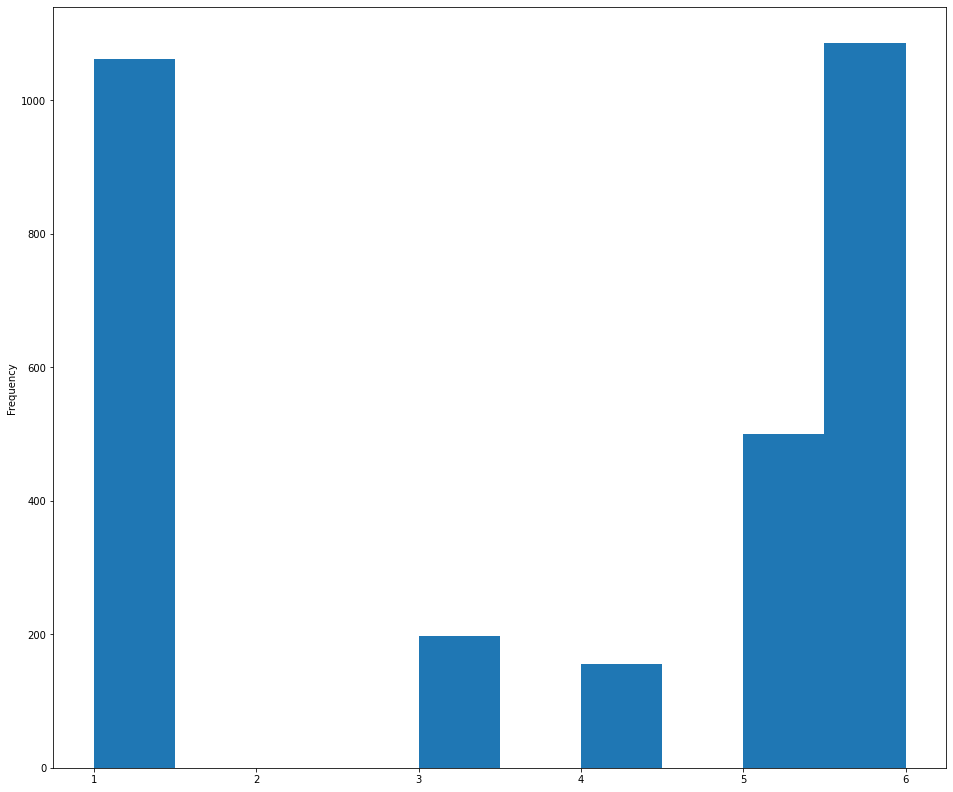

In [26]:
# Plot the histogram
import matplotlib.pyplot as plt

fig, ax = plt.subplots (figsize = (16, 14))
X.ConstellationType.plot (kind = "hist", ax = ax)

<AxesSubplot:xlabel='Svid', ylabel='RawPseudorangeMeters'>

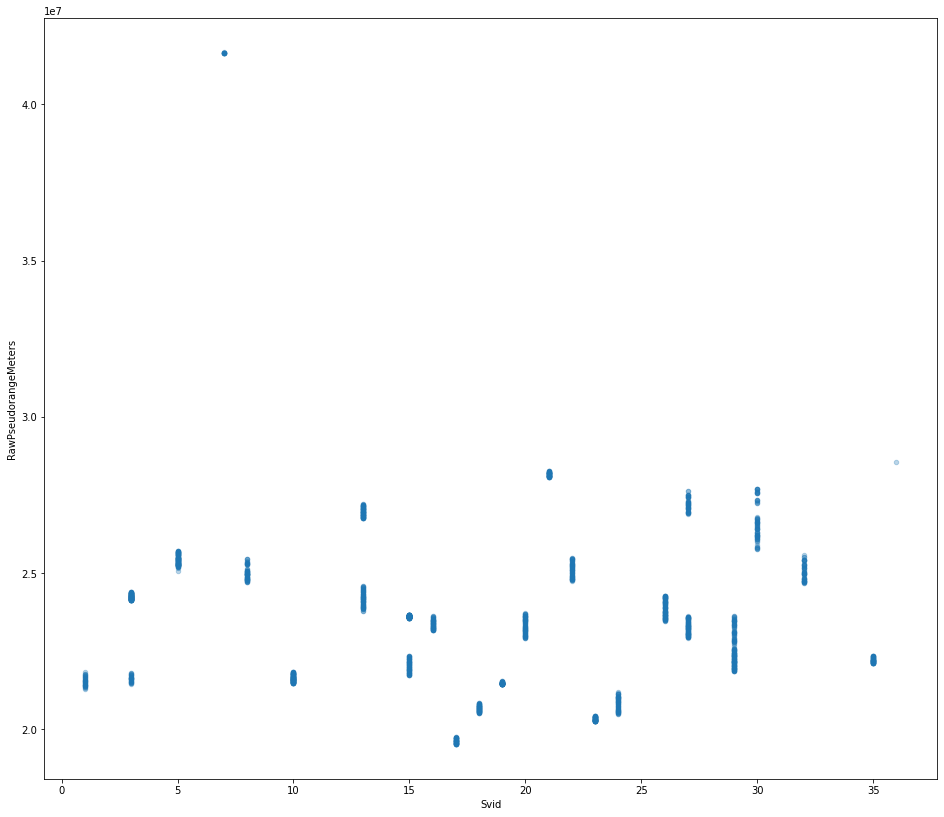

In [29]:
# Scatter plot
fig, ax = plt.subplots (figsize = (16, 14))
X.plot.scatter (x = "Svid", y = "RawPseudorangeMeters", ax = ax, alpha = 0.3)